#**Laptop prising**

##**EDA**

In [ ]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [ ]:
# Read the file
df=pd.read_csv("/content/laptop - laptop.csv.csv")

In [ ]:
df.head()

,Unnamed: 0.1,Unnamed: 0,Company,TypeName,Inches,ScreenResolution,Cpu,Ram(GB),Memory,Gpu,OpSys,Weight (kg),Price
0,0,0.0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8.0,128 SSD,Intel Iris Plus Graphics 640,macOS,1.37,71378.7
1,1,1.0,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8.0,128 Flash Storage,Intel HD Graphics 6000,macOS,1.34,47895.5
2,2,2.0,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8.0,256 SSD,Intel HD Graphics 620,No OS,1.86,30636.0
3,3,3.0,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16.0,512 SSD,AMD Radeon Pro 455,macOS,1.83,135195.3
4,4,4.0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8.0,256 SSD,Intel Iris Plus Graphics 650,macOS,1.37,96095.8


In [ ]:
df.shape
# This dataset is having
# column:-1303
# row:- 13

(1303, 13)

In [ ]:
# Dataset information
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1303 entries, 0 to 1302
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Unnamed: 0.1      1303 non-null   int64  
 1   Unnamed: 0        1273 non-null   float64
 2   Company           1273 non-null   object 
 3   TypeName          1273 non-null   object 
 4   Inches            1273 non-null   object 
 5   ScreenResolution  1273 non-null   object 
 6   Cpu               1273 non-null   object 
 7   Ram(GB)           1273 non-null   float64
 8   Memory            1273 non-null   object 
 9   Gpu               1273 non-null   object 
 10  OpSys             1273 non-null   object 
 11  Weight (kg)       1273 non-null   object 
 12  Price             1273 non-null   float64
dtypes: float64(3), int64(1), object(9)
memory usage: 132.5+ KB


In [ ]:
df = df.drop(columns=['Unnamed: 0.1'])
df = df.drop(columns=['Unnamed: 0'])

Here unnamed column 0.1 have 1303 rows but other columns have 1273 rows, means several rows are null


In [ ]:
# Checking for missing/null value
df.isnull().sum()

,0
Company,30
TypeName,30
Inches,30
ScreenResolution,30
Cpu,30
Ram(GB),30
Memory,30
Gpu,30
OpSys,30
Weight (kg),30


##**DATA PRE-PROCESSING**

In [ ]:
# Drop null rows
# Store all edited data in new dataframe called df1
df1=df.dropna()
df1.info()


<class 'pandas.core.frame.DataFrame'>
Index: 1273 entries, 0 to 1302
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Company           1273 non-null   object 
 1   TypeName          1273 non-null   object 
 2   Inches            1273 non-null   object 
 3   ScreenResolution  1273 non-null   object 
 4   Cpu               1273 non-null   object 
 5   Ram(GB)           1273 non-null   float64
 6   Memory            1273 non-null   object 
 7   Gpu               1273 non-null   object 
 8   OpSys             1273 non-null   object 
 9   Weight (kg)       1273 non-null   object 
 10  Price             1273 non-null   float64
dtypes: float64(2), object(9)
memory usage: 119.3+ KB


In [ ]:
# Reset the index actully pandas created dataframe with 1303 indexs
# but now we have drop the null rows so we have values upto 1273,
# so to match the values and index ,reset the index
df1 = df1.reset_index(drop=True)

In [ ]:
df1.shape

(1273, 11)

###**Datatype of weight is object we have to change it in float**


In [ ]:
# One value in weighr(kg) column is '?' so we have to replace it with null
# Replace '?' with NaN in the 'Weight (kg)' column
df1['Weight (kg)'] = df1['Weight (kg)'].replace('?', np.nan)

# Now convert the 'Weight (kg)' column to float
df1['Weight (kg)'] = df1['Weight (kg)'].astype(float)

# Display info to confirm the change
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1273 entries, 0 to 1272
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Company           1273 non-null   object 
 1   TypeName          1273 non-null   object 
 2   Inches            1273 non-null   object 
 3   ScreenResolution  1273 non-null   object 
 4   Cpu               1273 non-null   object 
 5   Ram(GB)           1273 non-null   float64
 6   Memory            1273 non-null   object 
 7   Gpu               1273 non-null   object 
 8   OpSys             1273 non-null   object 
 9   Weight (kg)       1272 non-null   float64
 10  Price             1273 non-null   float64
dtypes: float64(3), object(8)
memory usage: 109.5+ KB


###**Datatype of Inches is object we have to change it in float**


In [ ]:
# One value in Inches column is '?' so we have to replace it with null
# Replace '?' with NaN in the 'Inches' column
df1['Inches'] = df1['Inches'].replace('?', np.nan)

# Now convert the 'Inches' column to float
df1['Inches'] = df1['Inches'].astype(float)

# Display info to confirm the change
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1273 entries, 0 to 1272
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Company           1273 non-null   object 
 1   TypeName          1273 non-null   object 
 2   Inches            1272 non-null   float64
 3   ScreenResolution  1273 non-null   object 
 4   Cpu               1273 non-null   object 
 5   Ram(GB)           1273 non-null   float64
 6   Memory            1273 non-null   object 
 7   Gpu               1273 non-null   object 
 8   OpSys             1273 non-null   object 
 9   Weight (kg)       1272 non-null   float64
 10  Price             1273 non-null   float64
dtypes: float64(4), object(7)
memory usage: 109.5+ KB


###**Checking for unique values**

In [ ]:
df1.nunique()

,0
Company,19
TypeName,6
Inches,24
ScreenResolution,40
Cpu,118
Ram(GB),10
Memory,40
Gpu,106
OpSys,9
Weight (kg),180


###**Handling Duplicated**

In [ ]:
df1.duplicated().sum() # no duplicate

np.int64(29)

###**Discription of the dataframe**

In [ ]:
#Discription of numerical columns
df1.describe()

,Inches,Ram(GB),Weight (kg),Price
count,1272.000000,1273.000000,1272.000000,1273.000000
mean,15.130818,8.462687,2.077618,59955.804713
std,1.954436,5.564408,0.807808,37332.250492
min,10.100000,1.000000,0.000200,9270.700000
25%,14.000000,4.000000,1.500000,31914.700000
50%,15.600000,8.000000,2.040000,52161.100000
75%,15.600000,8.000000,2.320000,79333.400000
max,35.600000,64.000000,11.100000,324954.700000


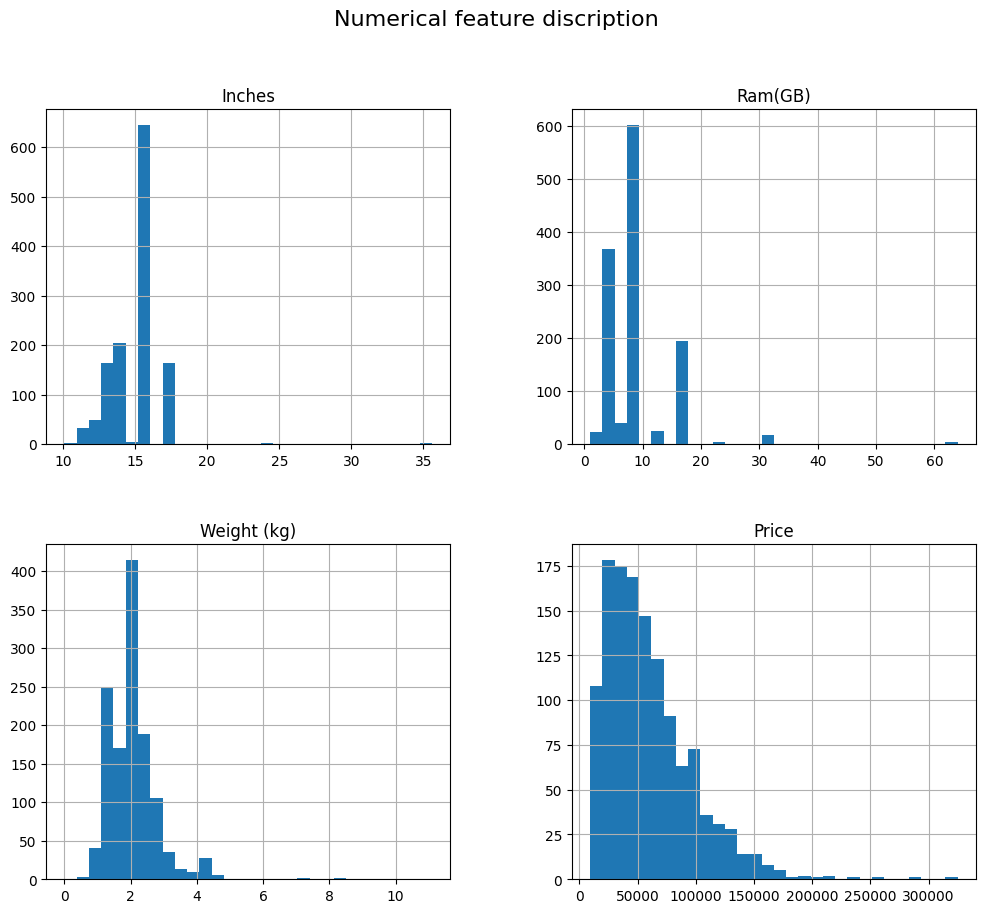

In [ ]:
# graphical representation of numerical column
df1.hist(figsize=(12,10),bins=30)
plt.suptitle("Numerical feature discription",fontsize=16)
plt.show()

In [ ]:
#categorical columns
df1.select_dtypes(exclude=('int','float')).columns

Index(['Company', 'TypeName', 'ScreenResolution', 'Cpu', 'Memory', 'Gpu',
       'OpSys'],
      dtype='object')

In [ ]:
#Discription of categorical columns
df1.describe(include=['object'])

,Company,TypeName,ScreenResolution,Cpu,Memory,Gpu,OpSys
count,1273,1273,1273,1273,1273,1273,1273
unique,19,6,40,118,40,106,9
top,Lenovo,Notebook,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,256 SSD,Intel HD Graphics 620,Windows 10
freq,290,710,495,183,401,272,1047


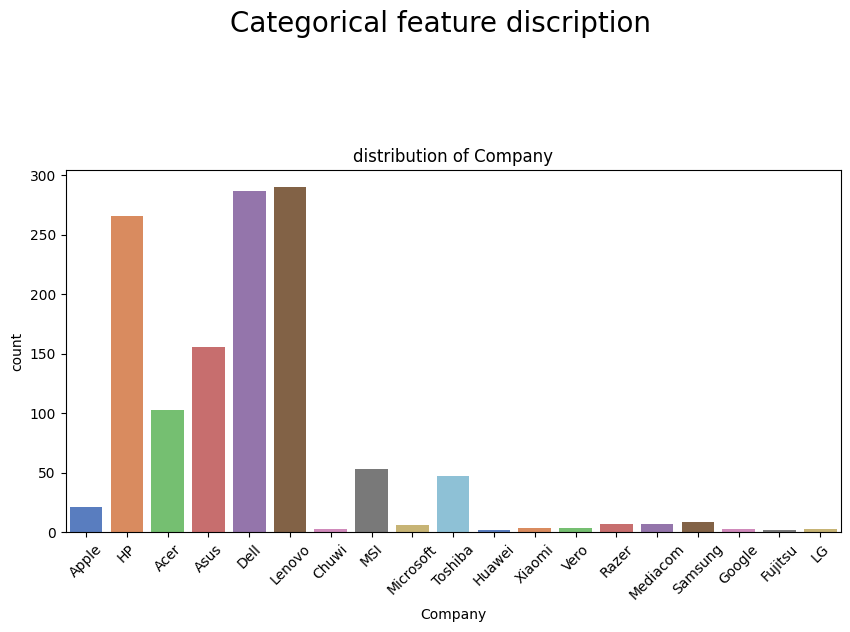

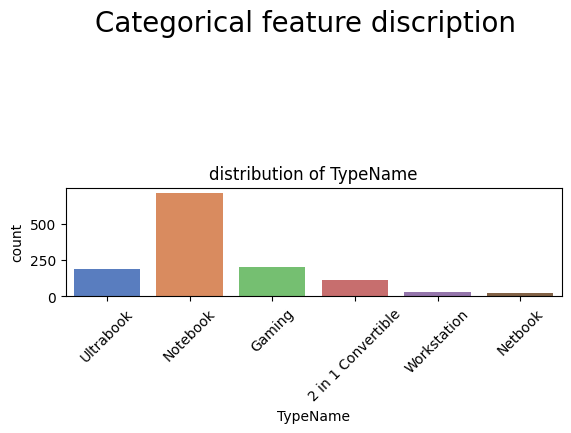

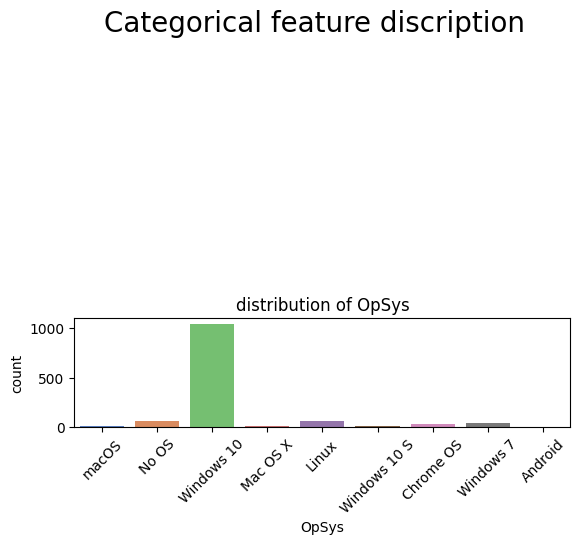

In [ ]:
#Graphical representation of categorical columns
cat_col=['Company', 'TypeName','OpSys']
plt.figure(figsize=(10, 16)) # Adjust figure size based on number of rows


for i,col in enumerate(cat_col,1):
  plt.subplot(3,1, i) # Create a subplot in the grid
  plt.suptitle("Categorical feature discription",fontsize=20)
  sns.countplot(data=df1,x=col,palette="muted")
  plt.title(f"distribution of {col}")
  plt.xticks(rotation=45)
  plt.show()

##**Box-plot**
To check for outliers

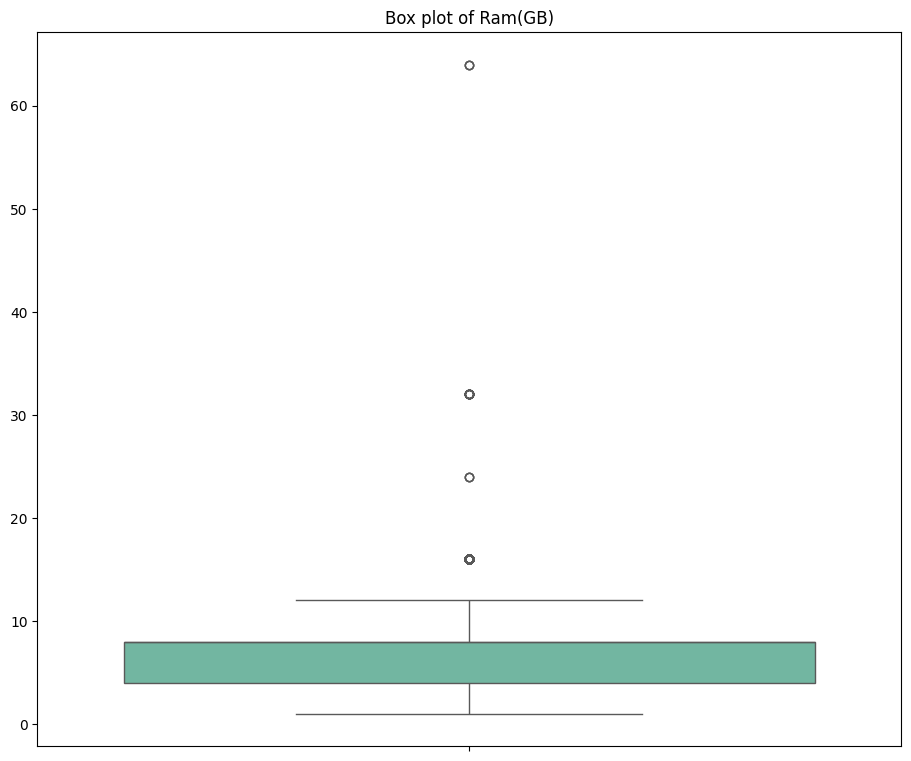

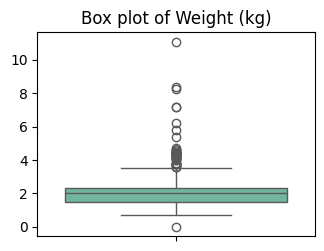

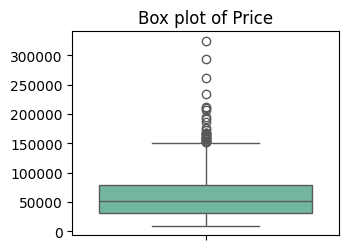

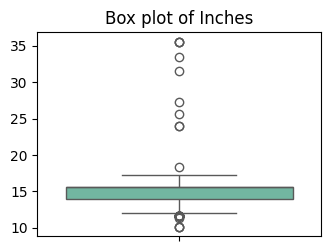

In [ ]:
#Box-plot for the numerical features to check for the outliers
num_feature=['Ram(GB)','Weight (kg)','Price','Inches']
plt.figure(figsize=(18,15))
for i,col in enumerate(num_feature,1):
  plt.subplot(2,2,i)
  sns.boxplot(data=df1,y=col,palette='Set2')
  plt.ylabel("")
  plt.title(f"Box plot of {col}")
  plt.tight_layout()
  plt.show()

##**Heatmap / Correlation Matrix**
* To see the coreelation between the different columns
* |r|>0.85     -> strong correlation
* 0.4>|r|<0.85 -> moderate correlation
* |r|<0.4      -> weak correlation

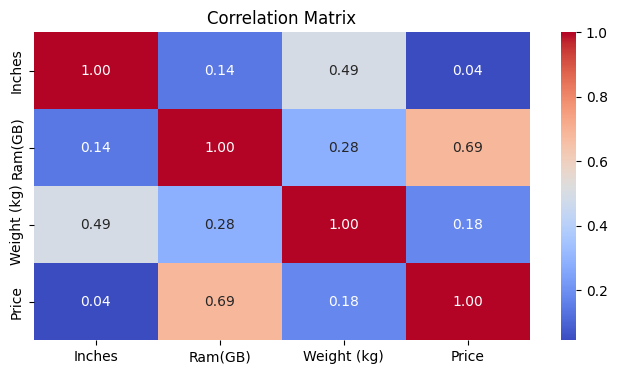

In [ ]:
# Heat Map
plt.figure(figsize=(8,4))
sns.heatmap(df1.select_dtypes(include=['number']).corr(),annot=True,cmap="coolwarm",fmt=".2f")
plt.title("Correlation Matrix")
plt.show()

### From above matrix we get to know that **Ram and price** of laptop have **good moderate** correlation and **weight and inches** have **moderate correlation**

# **HANDLING NULL VALUE**

In [ ]:
df1.isnull().sum()
# we have one null value in weight coloum

,0
Company,0
TypeName,0
Inches,1
ScreenResolution,0
Cpu,0
Ram(GB),0
Memory,0
Gpu,0
OpSys,0
Weight (kg),1


###**print whole row with null value**

In [ ]:
df1[df1.isna().any(axis=1)]

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram(GB),Memory,Gpu,OpSys,Weight (kg),Price
201,Dell,Ultrabook,13.3,Full HD 1920x1080,Intel Core i7 8550U 1.8GHz,8.0,256 SSD,Intel UHD Graphics 620,Windows 10,NaN,77202.7
465,Dell,Workstation,NaN,Full HD 1920x1080,Intel Core i7 7700HQ 2.8GHz,8.0,256 SSD,Nvidia Quadro M1200,Windows 10,1.78,128298.2


## **Handling null value in weight**


> Add blockquote




#### We minimize the scope to fill the null weight to mean of laptops of **Dell Ultrabook with 13.3 inches and with ram 8gb**

In [ ]:
#Dataframe with having laptops of  Dell Ultrabook with 13.3 inches and with ram 8gb
df1_weight=df1[(df1.Company=='Dell') & (df1.TypeName=='Ultrabook')&(df1.Inches==13.3)&(df1['Ram(GB)']==8.0)]
df1_weight

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram(GB),Memory,Gpu,OpSys,Weight (kg),Price
19,Dell,Ultrabook,13.3,IPS Panel Full HD / Touchscreen 1920x1080,Intel Core i5 8250U 1.6GHz,8.0,128 SSD,Intel UHD Graphics 620,Windows 10,1.22,52161.1
86,Dell,Ultrabook,13.3,IPS Panel Full HD 1920x1080,Intel Core i7 8550U 1.8GHz,8.0,256 SSD,Intel UHD Graphics 620,Windows 10,1.21,87858.7
108,Dell,Ultrabook,13.3,Quad HD+ / Touchscreen 3200x1800,Intel Core i7 7560U 2.4GHz,8.0,256 SSD,Intel Iris Plus Graphics 640,Windows 10,1.23,73473.1
111,Dell,Ultrabook,13.3,IPS Panel Full HD 1920x1080,Intel Core i5 8250U 1.6GHz,8.0,256 SSD,Intel UHD Graphics 620,Windows 10,1.21,86793.1
175,Dell,Ultrabook,13.3,Full HD 1920x1080,Intel Core i5 8250U 1.6GHz,8.0,256 SSD,Intel UHD Graphics 620,Windows 10,1.23,74538.7
200,Dell,Ultrabook,13.3,IPS Panel 4K Ultra HD / Touchscreen 3840x2160,Intel Core i7 8550U 1.8GHz,8.0,256 SSD,Intel UHD Graphics 620,Windows 10,1.21,103842.7
201,Dell,Ultrabook,13.3,Full HD 1920x1080,Intel Core i7 8550U 1.8GHz,8.0,256 SSD,Intel UHD Graphics 620,Windows 10,NaN,77202.7
207,Dell,Ultrabook,13.3,IPS Panel Full HD 1920x1080,Intel Core i7 8550U 1.8GHz,8.0,256 SSD,AMD Radeon 530,Windows 10,1.40,49650.6
247,Dell,Ultrabook,13.3,Full HD 1920x1080,Intel Core i5 8250U 1.6GHz,8.0,256 SSD,Intel UHD Graphics 620,Windows 10,1.41,50562.7
334,Dell,Ultrabook,13.3,Full HD 1920x1080,Intel Core i7 8550U 1.8GHz,8.0,256 SSD,Intel UHD Graphics 620,Windows 10,1.20,84129.1


In [ ]:
# We will use the mean of weight of df1_weight dataframe to replace null value
df1_weight_mean=round(df1_weight['Weight (kg)'].mean(),2)
df1_weight_mean

np.float64(1.26)

In [ ]:
df1['Weight (kg)']=df1['Weight (kg)'].fillna(df1_weight_mean)

## **Handling null value in inches**


In [ ]:
#Dataframe with having laptops of  Dell Ultrabook with 13.3 inches and with ram 8gb
df1_inches=df1[(df1.Company=='Dell') & (df1.TypeName=='Workstation')&(df1['Ram(GB)']==8.0)]
df1_inches

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram(GB),Memory,Gpu,OpSys,Weight (kg),Price
376,Dell,Workstation,15.6,Full HD 1920x1080,Intel Core i5 6440HQ 2.6GHz,8.0,500 HDD,AMD FirePro W5130M,Windows 10,2.23,72940.3
377,Dell,Workstation,15.6,IPS Panel Full HD 1920x1080,Intel Core i7 6820HQ 2.7GHz,8.0,256 SSD,Nvidia Quadro M1200,Windows 10,2.00,113752.8
387,Dell,Workstation,15.6,4K Ultra HD / Touchscreen 3840x2160,Intel Core i7 7700HQ 2.8GHz,8.0,256 SSD,Nvidia Quadro M1200,Windows 10,1.78,144495.4
436,Dell,Workstation,15.6,Full HD 1920x1080,Intel Xeon E3-1505M V6 3GHz,8.0,64 Flash Storage + 1TB HDD,Nvidia Quadro M620,Windows 10,2.23,106187.0
465,Dell,Workstation,NaN,Full HD 1920x1080,Intel Core i7 7700HQ 2.8GHz,8.0,256 SSD,Nvidia Quadro M1200,Windows 10,1.78,128298.2
586,Dell,Workstation,15.6,Full HD / Touchscreen 1920x1080,Intel Core i7 7700HQ 2.8GHz,8.0,256 SSD,Nvidia Quadro M620,Windows 10,2.06,93932.6
847,Dell,Workstation,15.6,Full HD 1920x1080,Intel Core i7 7700HQ 2.8GHz,8.0,1TB HDD,Nvidia Quadro M620,Windows 10,2.23,94731.8


In [ ]:
# We will use the mean of inches of df1_inches dataframe to replace null value
df1_inches_mean=df1_inches['Inches'].mean()
df1_inches_mean

np.float64(15.6)

In [ ]:
df1['Inches']=df1['Inches'].fillna(df1_inches_mean)

In [ ]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1273 entries, 0 to 1272
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Company           1273 non-null   object 
 1   TypeName          1273 non-null   object 
 2   Inches            1273 non-null   float64
 3   ScreenResolution  1273 non-null   object 
 4   Cpu               1273 non-null   object 
 5   Ram(GB)           1273 non-null   float64
 6   Memory            1273 non-null   object 
 7   Gpu               1273 non-null   object 
 8   OpSys             1273 non-null   object 
 9   Weight (kg)       1273 non-null   float64
 10  Price             1273 non-null   float64
dtypes: float64(4), object(7)
memory usage: 109.5+ KB


# **Handling Outliers**

In [ ]:
df1.describe()

,Inches,Ram(GB),Weight (kg),Price
count,1273.000000,1273.000000,1273.000000,1273.000000
mean,15.131186,8.462687,2.076976,59955.804713
std,1.953712,5.564408,0.807815,37332.250492
min,10.100000,1.000000,0.000200,9270.700000
25%,14.000000,4.000000,1.500000,31914.700000
50%,15.600000,8.000000,2.040000,52161.100000
75%,15.600000,8.000000,2.320000,79333.400000
max,35.600000,64.000000,11.100000,324954.700000


In [ ]:
# checking for max inches to check if outliers are genuine or not
df1_35inc=df1[(df1.Inches>25.6)]
df1_35inc

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram(GB),Memory,Gpu,OpSys,Weight (kg),Price
397,Lenovo,Notebook,35.6,Full HD 1920x1080,Intel Core i3 6006U 2GHz,4.0,500 HDD,Intel HD Graphics 520,Windows 10,2.20,21791.5
412,Asus,Notebook,35.6,Full HD 1920x1080,Intel Core i3 7100U 2.4GHz,8.0,1TB HDD,Nvidia GeForce 940MX,Linux,2.30,31808.2
413,Dell,Gaming,27.3,IPS Panel 2560x1440,Intel Core i7 7820HK 2.9GHz,16.0,256 SSD + 1TB HDD,Nvidia GeForce GTX 1070,Windows 10,4.42,149130.7
447,Microsoft,Ultrabook,33.5,Touchscreen 2256x1504,Intel Core i7 7660U 2.5GHz,8.0,256 SSD,Intel Iris Plus Graphics 640,Windows 10 S,1.25,95850.7
579,Dell,2 in 1 Convertible,31.6,Touchscreen 1366x768,Intel Core M 7Y30 1.0GHz,4.0,128 SSD,Intel HD Graphics 615,Windows 10,1.39,32127.8
656,Lenovo,Notebook,35.6,1366x768,AMD E-Series E2-9000 2.2GHz,4.0,128 SSD,AMD Radeon R2 Graphics,Windows 10,2.20,18594.7


In [ ]:
# checking for max price to check if outliers are genuine or not

df1_max_price=df1[(df1.Price==324954.7)]
df1_max_price

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram(GB),Memory,Gpu,OpSys,Weight (kg),Price
189,Razer,Gaming,17.3,4K Ultra HD / Touchscreen 3840x2160,Intel Core i7 7820HK 2.9GHz,32.0,1TB SSD,Nvidia GeForce GTX 1080,Windows 10,3.49,324954.7


In [ ]:
# checking for max ram to check if outliers are genuine or not
max_ram=df1[df1['Ram(GB)']==64]
max_ram

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram(GB),Memory,Gpu,OpSys,Weight (kg),Price
68,Dell,Ultrabook,13.3,IPS Panel Full HD 1920x1080,Intel Core i7 8550U 1.8GHz,64.0,256 SSD,AMD Radeon 530,Windows 10,1.40,50882.4
702,Lenovo,Ultrabook,14.0,IPS Panel Quad HD+ 2560x1440,Intel Core i7 6500U 2.5GHz,64.0,512 SSD,Intel HD Graphics 520,Windows 10,1.17,89864.2
1038,Asus,Gaming,17.3,IPS Panel Full HD 1920x1080,Intel Core i7 6820HK 2.7GHz,64.0,1TB SSD,Nvidia GeForce GTX 980,Windows 10,3.58,211788.0


In [ ]:
# checking for mimum weight in laptops
min_weight=df1[df1['Weight (kg)']<1]
min_weight


NameError: name 'df1' is not defined

After looking at this data we get one minimum value i.e. 0.0002kg weight of laptop,
the weight of laptop cant we such low, lets replace this value with most likely one

In [ ]:
df1_weight2=df1[(df1.Company=='Dell') & (df1.TypeName=='Ultrabook')&(df1.Inches==15.6)&(df1['Ram(GB)']==8.0)]
df1_weight2

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram(GB),Memory,Gpu,OpSys,Weight (kg),Price
27,Dell,Ultrabook,15.6,Full HD 1920x1080,Intel Core i7 8650U 1.9GHz,8.0,256 SSD + 256 SSD,Intel UHD Graphics 620,Windows 10,1.8800,69157.4
77,Dell,Ultrabook,15.6,IPS Panel Full HD 1920x1080,Intel Core i5 8250U 1.6GHz,8.0,256 SSD,Intel UHD Graphics 620,Windows 10,1.8800,58403.4
339,Dell,Ultrabook,15.6,Full HD 1920x1080,Intel Core i5 8250U 1.6GHz,8.0,1TB HDD,AMD Radeon 530,Windows 10,0.0002,35324.6


In [ ]:
# Handle the minimum value with approprite value match with similer kind of specifications

df1['Weight (kg)']=df1['Weight (kg)'].replace(0.0002,1.8800)


In [ ]:
#Check for weight of laptop above 5 kg
max_weight=df1[df1['Weight (kg)']<5]
max_weight


,Company,TypeName,Inches,ScreenResolution,Cpu,Ram(GB),Memory,Gpu,OpSys,Weight (kg),Price
0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8.0,128 SSD,Intel Iris Plus Graphics 640,macOS,1.37,71378.7
1,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8.0,128 Flash Storage,Intel HD Graphics 6000,macOS,1.34,47895.5
2,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8.0,256 SSD,Intel HD Graphics 620,No OS,1.86,30636.0
3,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16.0,512 SSD,AMD Radeon Pro 455,macOS,1.83,135195.3
4,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8.0,256 SSD,Intel Iris Plus Graphics 650,macOS,1.37,96095.8
...,...,...,...,...,...,...,...,...,...,...,...
1268,Lenovo,2 in 1 Convertible,14.0,IPS Panel Full HD / Touchscreen 1920x1080,Intel Core i7 6500U 2.5GHz,4.0,128 SSD,Intel HD Graphics 520,Windows 10,1.80,33992.6
1269,Lenovo,2 in 1 Convertible,13.3,IPS Panel Quad HD+ / Touchscreen 3200x1800,Intel Core i7 6500U 2.5GHz,16.0,512 SSD,Intel HD Graphics 520,Windows 10,1.30,79866.7
1270,Lenovo,Notebook,14.0,1366x768,Intel Celeron Dual Core N3050 1.6GHz,2.0,64 Flash Storage,Intel HD Graphics,Windows 10,1.50,12201.1
1271,HP,Notebook,15.6,1366x768,Intel Core i7 6500U 2.5GHz,6.0,1TB HDD,AMD Radeon R5 M330,Windows 10,2.19,40705.9


## from above checking of rows and columns we get to know that outliers data in **columns inches,ram,and price** is legitimates but data in weight column is need correction  

In [ ]:
#creat the copy of dataframe to protect data changes
dfo2=df1.copy()

In [ ]:
# convert datatype of price into object
# to run price as target variable in model we need to normalise it or scale it
# So scale it we need object data to make it categorical data
dfo2['Price'] = dfo2['Price'].astype(object)
dfo2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1273 entries, 0 to 1272
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Company           1273 non-null   object 
 1   TypeName          1273 non-null   object 
 2   Inches            1273 non-null   float64
 3   ScreenResolution  1273 non-null   object 
 4   Cpu               1273 non-null   object 
 5   Ram(GB)           1273 non-null   float64
 6   Memory            1273 non-null   object 
 7   Gpu               1273 non-null   object 
 8   OpSys             1273 non-null   object 
 9   Weight (kg)       1273 non-null   float64
 10  Price             1273 non-null   object 
dtypes: float64(3), object(8)
memory usage: 109.5+ KB


##**Winsorization (Capping Outliers)**

* we will use winsorization method becasuse we want to keep data
* extreme great will replace with max value of the box
* extreme lower will replace with min value of the box

In [ ]:
# Applying winsarization
from scipy.stats.mstats import winsorize
# Apply Winsorization to weight columns (capping extreme max values at 95%)
dfo2['Weight (kg)'] = winsorize(dfo2['Weight (kg)'], limits=[0, 0.05])
# lower limit there is no outlier

print("Original Data Shape:", dfo2.shape)
print("After Winsorization (Capping):", dfo2.shape)

Original Data Shape: (1273, 11)
After Winsorization (Capping): (1273, 11)


In [ ]:
# We can clearly see the we change the values of outliers in weight

dfo2.describe()


,Inches,Ram(GB),Weight (kg)
count,1273.000000,1273.000000,1273.000000
mean,15.131186,8.462687,2.020911
std,1.953712,5.564408,0.587612
min,10.100000,1.000000,0.690000
25%,14.000000,4.000000,1.500000
50%,15.600000,8.000000,2.040000
75%,15.600000,8.000000,2.320000
max,35.600000,64.000000,3.350000


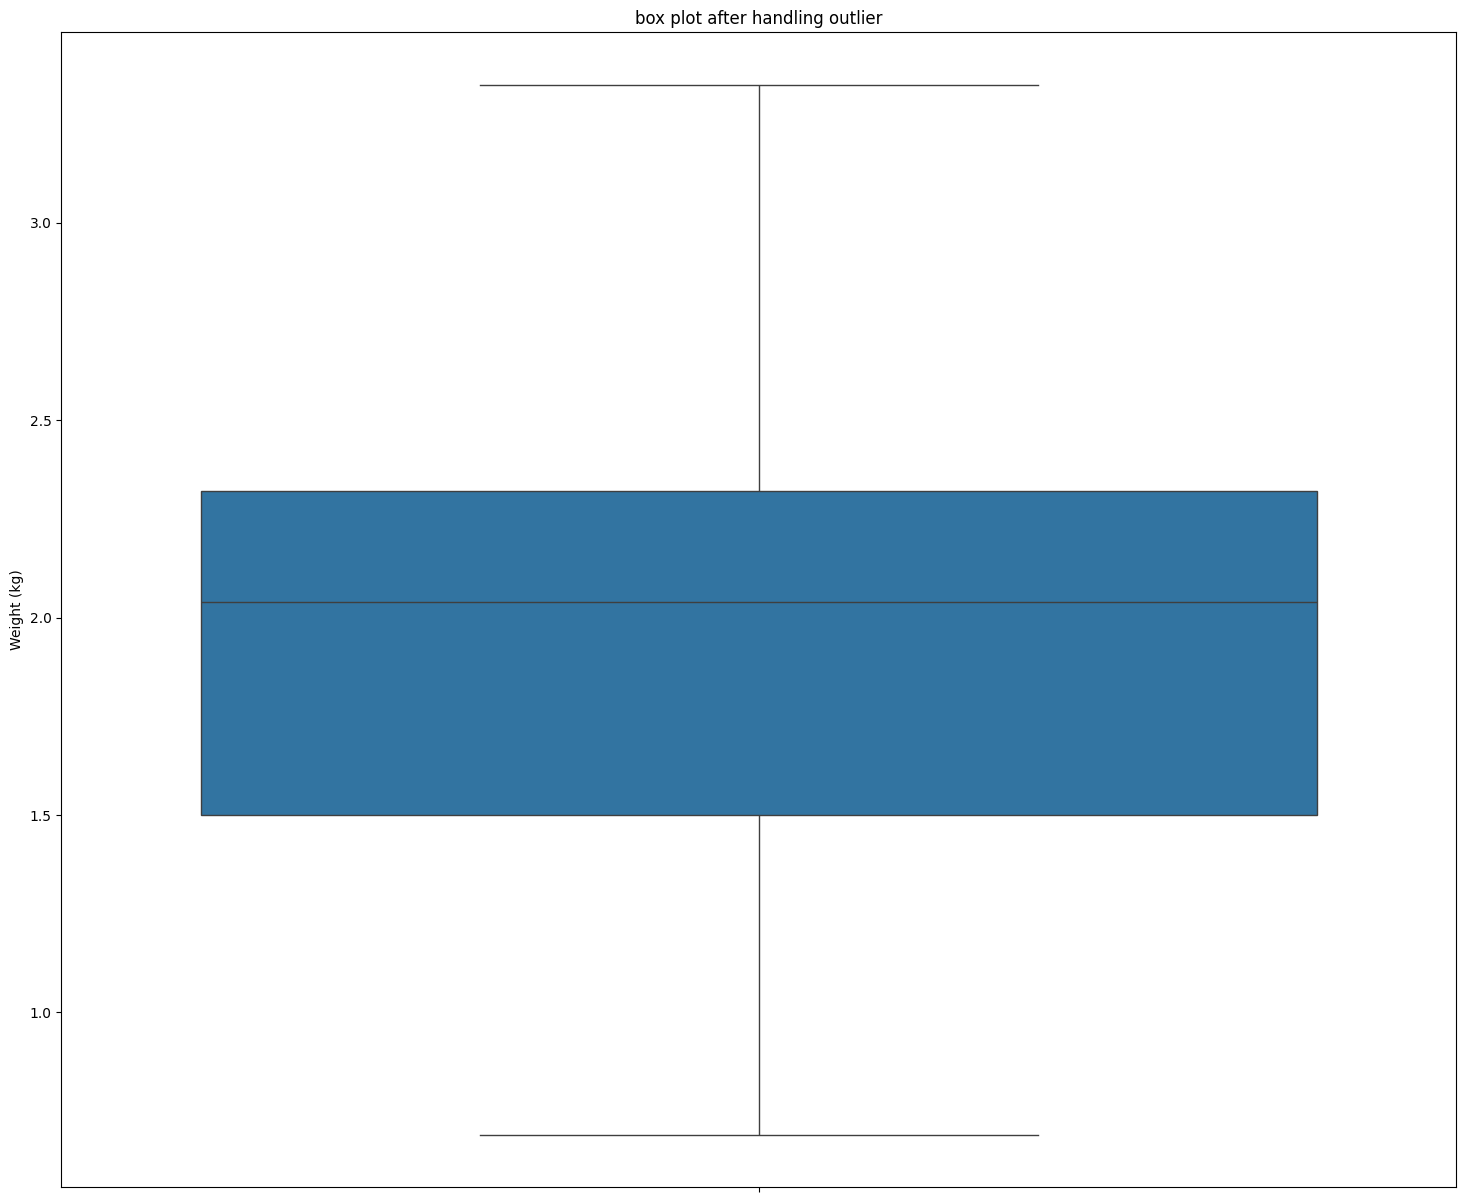

In [ ]:
# Visualize the boxplot after handling outliers
plt.figure(figsize=(18,15))
sns.boxplot(data=dfo2,y='Weight (kg)')
plt.title("box plot after handling outlier")
plt.show()

# **SCALING**

In [ ]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler, RobustScaler


In [ ]:
df_robust = dfo2.copy()
df_minmax = dfo2.copy()


## RobustScaler

In [ ]:
# As we have lots of outliers we will use Robust scaler

# Selecting only numerical columns for scaling
num_cols = df_robust.select_dtypes(include=['number']).columns

robust_scaler = RobustScaler()
df_robust[num_cols] = robust_scaler.fit_transform(df_robust[num_cols])

In [ ]:
# Min-Max Scaling (0 to 1 Range)
minmax_scaler = MinMaxScaler()
df_minmax[num_cols] = minmax_scaler.fit_transform(df_minmax[num_cols])

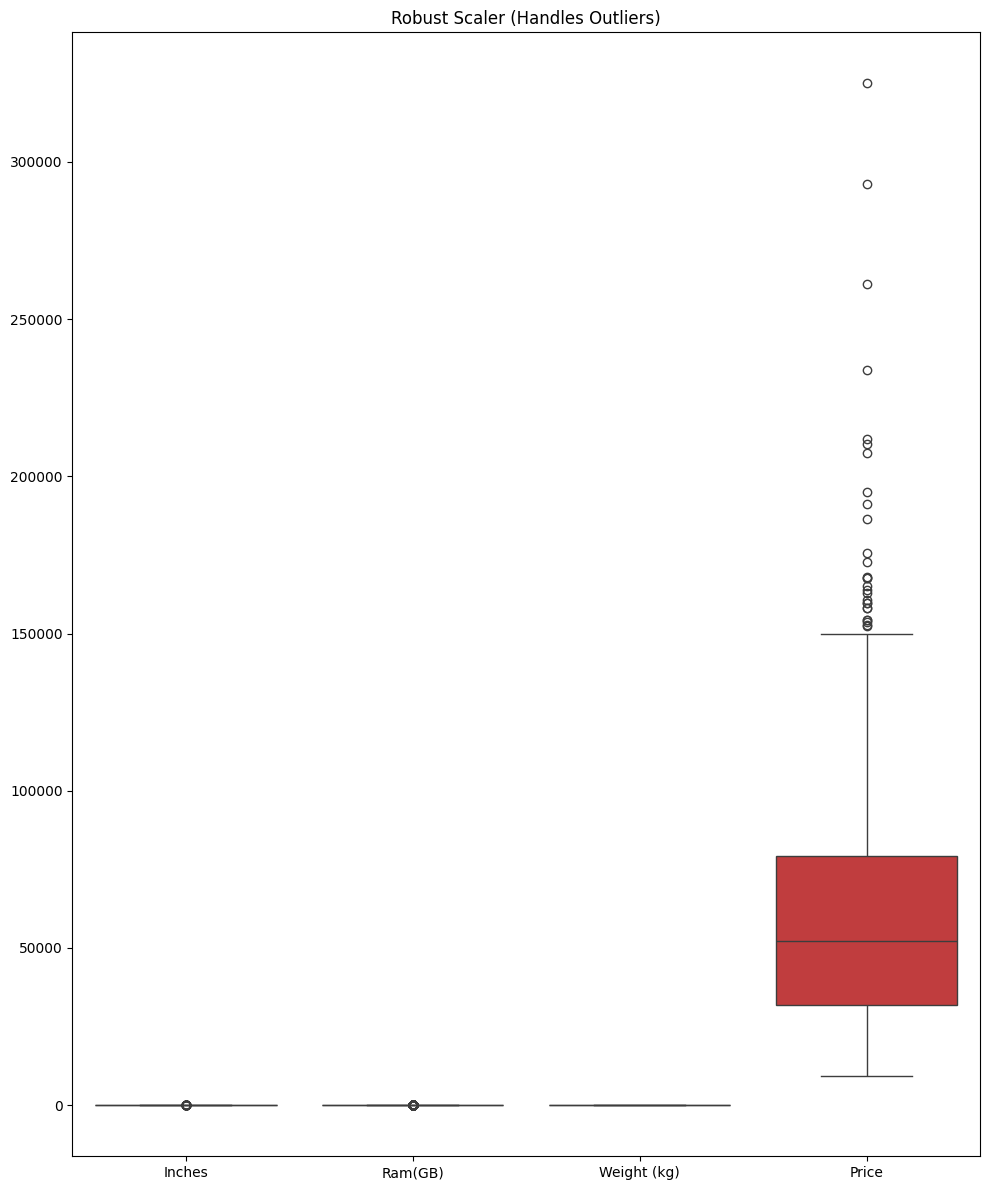

In [ ]:
# Create a single figure and axes for the Robust Scaler boxplot
fig, axes = plt.subplots(figsize=(10, 12))

# Plot the boxplot on the single axes object
sns.boxplot(data=df_robust, ax=axes) # Use 'axes' directly, not axes[2]
axes.set_title("Robust Scaler (Handles Outliers)")

plt.tight_layout()
plt.show()

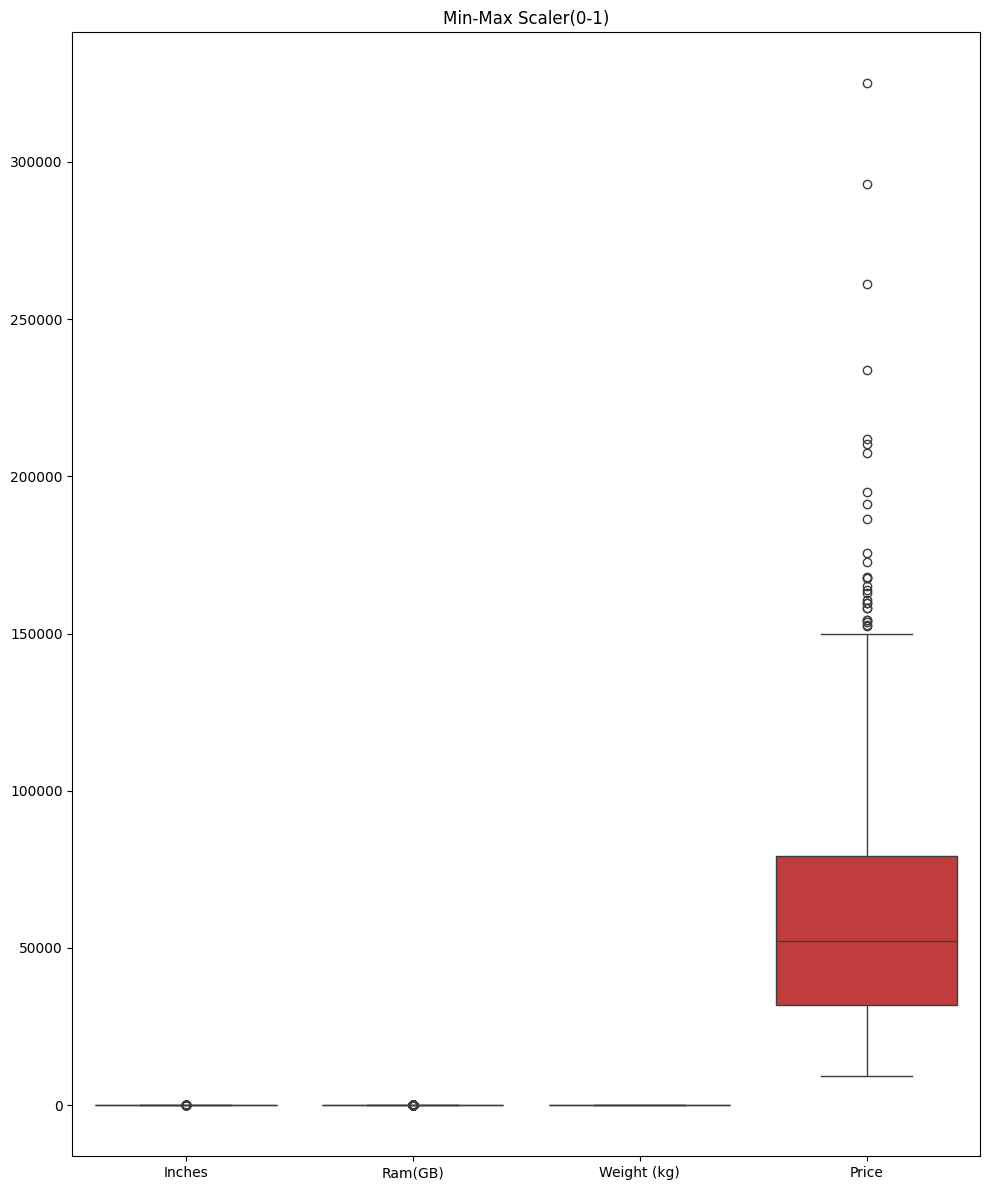

In [ ]:
# Create a single figure and axes for the Robust Scaler boxplot
fig, axes = plt.subplots(figsize=(10, 12))

# Plot the boxplot on the single axes object
sns.boxplot(data=df_minmax, ax=axes) # Use 'axes' directly, not axes[2]
axes.set_title("Min-Max Scaler(0-1)")

plt.tight_layout()
plt.show()

# **ENCODING**

In [ ]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder


## **Robust method encoding**

In [ ]:
# Selecting categorical columns for Robust scaler encoding
cat_colsR = df_robust.select_dtypes(include=['object']).columns

### **Label Encoding**

```
```



In [ ]:
# Label Encoding
df_label_encodedR = df_robust.copy()
label_encoder = LabelEncoder()
for col in cat_colsR:
    df_label_encodedR[col] = label_encoder.fit_transform(df_label_encodedR[col])

In [ ]:
# Display results
print("Label Encoded Data:")
print(df_label_encodedR.head())
print("\nUnique Values in Each Column:")
print(df_label_encodedR.shape)

Label Encoded Data:
   Company  TypeName  Inches  ScreenResolution  Cpu  Ram(GB)  Memory  Gpu  \
0        1         4 -1.4375                23   65      0.0       4   56   
1        1         4 -1.4375                 1   63      0.0       2   50   
2        7         3  0.0000                 8   74      0.0      16   52   
3        1         4 -0.1250                25   85      2.0      29    8   
4        1         4 -1.4375                23   67      0.0      16   57   

   OpSys  Weight (kg)  Price  
0      8    -0.817073    517  
1      8    -0.853659    338  
2      4    -0.219512    164  
3      8    -0.256098    732  
4      8    -0.817073    627  

Unique Values in Each Column:
(1273, 11)


Unlike some other scalers (like MinMaxScaler which scales values to a fixed range like 0 to 1), RobustScaler scales features using statistics that are robust to outliers. Specifically, it centers the data by removing the median and scales the data by dividing by the interquartile range (IQR).

The formula it uses is:

Scaled Value = (Original Value - Median) / IQR

Here's why this can result in negative values:

If an original value is less than the median of that column, the term (Original Value - Median) will be negative.
Since the IQR is always a positive value, dividing a negative number by a positive number results in a negative number.
So, the negative values in your output indicate that those particular data points had original values that were below the median value of their respective columns before scaling.

This is a normal and expected behavior when using RobustScaler, as its primary goal is to scale data relative to the median and IQR, rather than to a strictly positive range.

### **one hot encoded**

In [ ]:
df_one_hot_encodedR = pd.get_dummies(df_robust, columns=cat_colsR, drop_first=True)

In [ ]:
print("\nOne-Hot Encoded Data:")
print(df_one_hot_encodedR.head())
print(df_one_hot_encodedR.shape)


One-Hot Encoded Data:
   Inches  Ram(GB)  Weight (kg)  Company_Apple  Company_Asus  Company_Chuwi  \
0 -1.4375      0.0    -0.817073           True         False          False   
1 -1.4375      0.0    -0.853659           True         False          False   
2  0.0000      0.0    -0.219512          False         False          False   
3 -0.1250      2.0    -0.256098           True         False          False   
4 -1.4375      0.0    -0.817073           True         False          False   

   Company_Dell  Company_Fujitsu  Company_Google  Company_HP  ...  \
0         False            False           False       False  ...   
1         False            False           False       False  ...   
2         False            False           False        True  ...   
3         False            False           False       False  ...   
4         False            False           False       False  ...   

   Price_186426.7  Price_191211.3  Price_194972.8  Price_207259.2  \
0           False 

## **Min max scaler encoding**

In [ ]:
# Selecting categorical columns for Robust scaler encoding
cat_colsM = df_minmax.select_dtypes(include=['object']).columns

### **label encoding for min max scale**

In [ ]:
# Label Encoding
df_label_encodedM = df_minmax.copy()
label_encoder = LabelEncoder()
for col in cat_colsM:
    df_label_encodedM[col] = label_encoder.fit_transform(df_label_encodedM[col])

In [ ]:
# Display results
print("Label Encoded Data:")
print(df_label_encodedM.head())
print("\nUnique Values in Each Column:")
print(df_label_encodedM.shape)

Label Encoded Data:
   Company  TypeName    Inches  ScreenResolution  Cpu   Ram(GB)  Memory  Gpu  \
0        1         4  0.125490                23   65  0.111111       4   56   
1        1         4  0.125490                 1   63  0.111111       2   50   
2        7         3  0.215686                 8   74  0.111111      16   52   
3        1         4  0.207843                25   85  0.238095      29    8   
4        1         4  0.125490                23   67  0.111111      16   57   

   OpSys  Weight (kg)  Price  
0      8     0.255639    517  
1      8     0.244361    338  
2      4     0.439850    164  
3      8     0.428571    732  
4      8     0.255639    627  

Unique Values in Each Column:
(1273, 11)


### **one hot encoadin for min max scaler**

In [ ]:
df_one_hot_encodedM = pd.get_dummies(df_minmax, columns=cat_colsM, drop_first=True)

In [ ]:
print("\nOne-Hot Encoded Data:")
print(df_one_hot_encodedM.head())
print(df_one_hot_encodedM.shape)


One-Hot Encoded Data:
     Inches   Ram(GB)  Weight (kg)  Company_Apple  Company_Asus  \
0  0.125490  0.111111     0.255639           True         False   
1  0.125490  0.111111     0.244361           True         False   
2  0.215686  0.111111     0.439850          False         False   
3  0.207843  0.238095     0.428571           True         False   
4  0.125490  0.111111     0.255639           True         False   

   Company_Chuwi  Company_Dell  Company_Fujitsu  Company_Google  Company_HP  \
0          False         False            False           False       False   
1          False         False            False           False       False   
2          False         False            False           False        True   
3          False         False            False           False       False   
4          False         False            False           False       False   

   ...  Price_186426.7  Price_191211.3  Price_194972.8  Price_207259.2  \
0  ...           False   

# **Data Splitting (Train-Test Split)**

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
# Define features (X) and target variable (y)
# we used label encoding done on the robust data to test andret train
X = df_label_encodedR.drop(columns=['Price'])  # Features
y = df_label_encodedR['Price']  # Target variable

In [ ]:
# code to train and test split 20-80

# Split the data into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
# random_state=42: This parameter is used to ensure that the data split is the same every time you run the code.
# Display the shapes of the resulting sets
print("Shape of X_train:", X_train.shape)
print("Shape of X_test:", X_test.shape)
print("Shape of y_train:", y_train.shape)
print("Shape of y_test:", y_test.shape)

Shape of X_train: (1018, 10)
Shape of X_test: (255, 10)
Shape of y_train: (1018,)
Shape of y_test: (255,)


# **Model Building**

## As this is supervised learning model with target variable as continous we are using regressision mode.

AS our data is complex and high-dimension  and target veriable is non-linear,we use Random Forest Algorethim as it combine prediction from multiple decision tree to produce more accurate and stable prediction

In [ ]:
from sklearn.ensemble import RandomForestRegressor
# Initialize the Random Forest Regressor model
# You can adjust parameters like n_estimators (number of trees)
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)

# Train the model on the training data
rf_model.fit(X_train, y_train)

# Make predictions on the test data
y_pred = rf_model.predict(X_test)


## **Model evaluation**

In [ ]:
from sklearn.metrics import mean_squared_error, r2_score

# Evaluate the model
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

print(f"Random Forest Regressor Performance:")
print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")
print(f"R-squared (R2): {r2:.2f}")


Random Forest Regressor Performance:
Root Mean Squared Error (RMSE): 75.68
R-squared (R2): 0.88


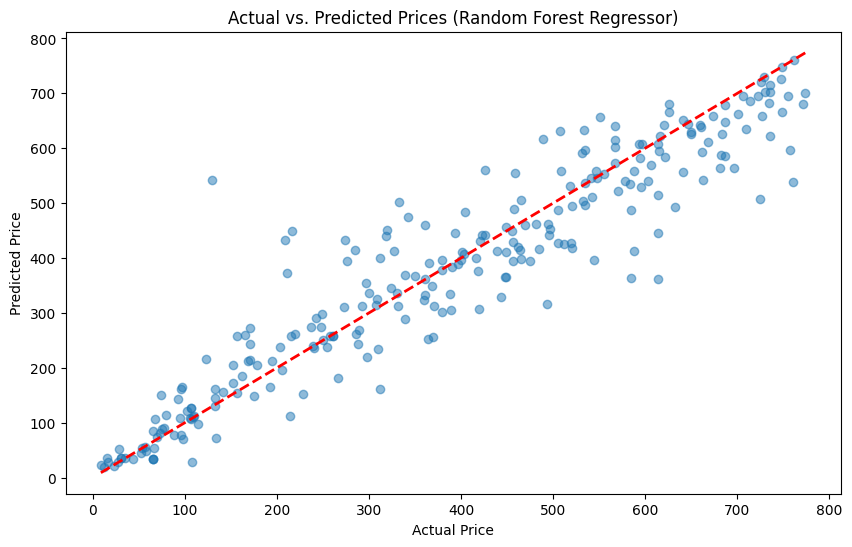

In [ ]:
# Visualize predicted vs actual prices
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2) # Diagonal line
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title("Actual vs. Predicted Prices (Random Forest Regressor)")
plt.show()

## hyperparamerter tuning


Best Hyperparameters: {'max_depth': 30, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 100}

Tuned Random Forest Regressor Performance:
Root Mean Squared Error (RMSE): 75.68
R-squared (R2): 0.88


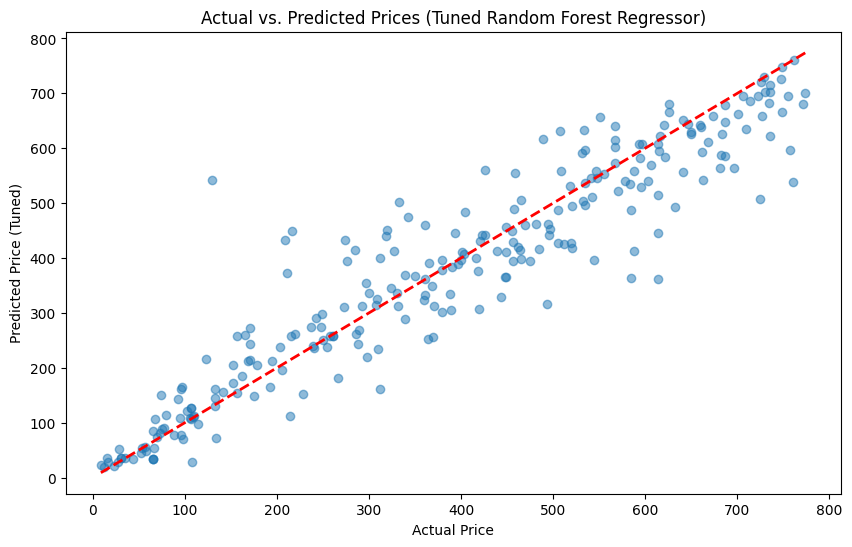

In [ ]:
from sklearn.model_selection import GridSearchCV

# Define the parameter grid for GridSearchCV
param_grid = {
    'n_estimators': [50, 100, 200],  # Number of trees in the forest
    'max_depth': [None, 10, 20, 30],  # Maximum depth of the trees
    'min_samples_split': [2, 5, 10],  # Minimum number of samples required to split an internal node
    'min_samples_leaf': [1, 2, 4]  # Minimum number of samples required to be at a leaf node
}

# Create a GridSearchCV object
# estimator: the model to tune (RandomForestRegressor)
# param_grid: the grid of parameters to search
# cv: number of cross-validation folds
# scoring: metric to evaluate the models (e.g., 'neg_mean_squared_error' or 'r2')
# n_jobs: number of jobs to run in parallel (-1 uses all available processors)
grid_search = GridSearchCV(estimator=rf_model, param_grid=param_grid,
                           cv=5, scoring='neg_mean_squared_error', n_jobs=-1)

# Fit the GridSearchCV object to the training data
grid_search.fit(X_train, y_train)

# Get the best parameters found by GridSearchCV
best_params = grid_search.best_params_
print("Best Hyperparameters:", best_params)

# Get the best model found by GridSearchCV
best_rf_model = grid_search.best_estimator_

# Evaluate the best model on the test data
y_pred_tuned = best_rf_model.predict(X_test)

# Evaluate the tuned model
rmse_tuned = np.sqrt(mean_squared_error(y_test, y_pred_tuned))
r2_tuned = r2_score(y_test, y_pred_tuned)

print(f"\nTuned Random Forest Regressor Performance:")
print(f"Root Mean Squared Error (RMSE): {rmse_tuned:.2f}")
print(f"R-squared (R2): {r2_tuned:.2f}")

# Visualize predicted vs actual prices for the tuned model
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred_tuned, alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2) # Diagonal line
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price (Tuned)")
plt.title("Actual vs. Predicted Prices (Tuned Random Forest Regressor)")
plt.show()


### According to above conclusion the model is performing very well with r square value and relatively low with rmse.

This suggest that Random Forest model is accuretly capturing the relationship between feature and price in the dataset

In [ ]:
# check that this model predicting the price of laptop in runtime

import pandas as pd
from sklearn.preprocessing import LabelEncoder, RobustScaler
def predict_laptop_price(model, input_data_raw, robust_scaler, label_encoders, X_train_columns):
  """
  Predicts the price of a laptop using the trained model after applying
  the same preprocessing steps as the training data.

  Args:
    model: The trained machine learning model (e.g., RandomForestRegressor).
    input_data_raw: A dictionary or pandas Series/DataFrame containing the
                    raw features of the laptop for which you want to predict
                    the price. The keys/column names should match the original
                    feature names before preprocessing (e.g., 'Inches', 'Company').
    robust_scaler: The fitted RobustScaler instance used during training.
    label_encoders: A dictionary mapping original categorical column names to
                    their fitted LabelEncoder instances used during training.
    X_train_columns: A list of the column names from the X_train DataFrame
                     in the order they appeared during training.

  Returns:
    A numpy array containing the predicted price(s).
  """
  # Convert raw input data to a DataFrame
  # Ensure it's a DataFrame even if a single row is provided as a dict/Series
  if isinstance(input_data_raw, dict):
      input_df = pd.DataFrame([input_data_raw])
  elif isinstance(input_data_raw, pd.Series):
      input_df = pd.DataFrame([input_data_raw.to_dict()])
  elif isinstance(input_data_raw, pd.DataFrame):
       input_df = input_data_raw.copy()
  else:
      raise TypeError("input_data_raw must be a dictionary, pandas Series, or pandas DataFrame.")


  # Apply the same preprocessing steps as done on the training data (X_train)
  # 1. Identify numerical and categorical columns in the input data based on the original data structure
  #    We need to know which columns were numeric and which were categorical BEFORE encoding/scaling.
  #    Based on the notebook, the original columns were:
  #    'Company', 'TypeName', 'Inches', 'ScreenResolution', 'Cpu', 'Ram(GB)',
  #    'Memory', 'Gpu', 'OpSys', 'Weight (kg)', 'Price' (target)

  #    Assuming the input_data_raw has these original column names:
  original_numerical_cols = ['Inches', 'Ram(GB)', 'Weight (kg)'] # Based on your data cleaning
  original_categorical_cols = ['Company', 'TypeName', 'ScreenResolution', 'Cpu', 'Memory', 'Gpu', 'OpSys'] # Based on your data cleaning

  # Ensure all expected raw columns are present in the input data
  expected_raw_cols = original_numerical_cols + original_categorical_cols
  for col in expected_raw_cols:
      if col not in input_df.columns:
          # Handle missing raw columns - you might need to raise an error or impute a default value
          # For this example, we'll raise an error
          raise ValueError(f"Input data is missing the raw feature: {col}")

  # 2. Apply Robust Scaling to numerical columns
  #    Ensure the input numerical columns are in the correct format (e.g., float) if needed
  #    Handle any potential non-numeric values in the raw input data if necessary
  input_df[original_numerical_cols] = robust_scaler.transform(input_df[original_numerical_cols])

  # 3. Apply Label Encoding to categorical columns
  for col in original_categorical_cols:
      if col in label_encoders: # Check if we have a trained encoder for this column
           # Handle potential unseen categories in new data - raise an error or use a default value
           # For simplicity here, we assume new data has categories seen during training.
           # In production, you'd likely need a more robust way (e.g., OHE, or handling unseen labels)
          input_df[col] = label_encoders[col].transform(input_df[col])
      else:
          # If a categorical column was in original data but not encoded (e.g., dropped), handle accordingly
          # Based on your code, all categorical columns were label encoded in df_label_encodedR
          raise ValueError(f"No LabelEncoder found for categorical column: {col}")


  # 4. Ensure the columns match X_train and are in the same order
  #    Drop any extra columns that might have been in the raw input but not in X_train
  #    Ensure all X_train columns are present (they should be if raw data is complete and processed)
  processed_input_df = input_df[X_train_columns] # Select and reorder columns to match X_train


  # Make the prediction
  predicted_price = model.predict(processed_input_df)

  return predicted_price

# Example of how to use the function with the best tuned model:
# This example now requires defining the raw data for a new laptop
# and passing the fitted scaler and encoders.

# You need to capture the fitted scaler and encoders from your training process.
# Based on your notebook, you fitted:
# - robust_scaler on df_robust[num_cols]
# - label_encoder repeatedly on each categorical column in df_robust

# Let's assume you have access to these fitted objects (e.g., they are still in memory
# from the earlier execution of your notebook cells).
# If not, you would need to save and load them.

# Re-creating the fitted transformers for demonstration (you would use the actual ones)
# You would need to re-run the cells that fit these transformers or load them.
# Assuming `df_robust` and `cat_colsR` and `num_cols` are available from previous cells.
if 'df_robust' in locals() and 'cat_colsR' in locals() and 'num_cols' in locals():
    # Re-fit the RobustScaler (use the one from your training flow)
    robust_scaler_fitted = RobustScaler()
    robust_scaler_fitted.fit(df_robust[num_cols]) # Fit on the data used for training scaling

    # Re-fit LabelEncoders for each categorical column (use the ones from your training flow)
    label_encoders_fitted = {}
    for col in cat_colsR:
        le = LabelEncoder()
        label_encoders_fitted[col] = le.fit(df_robust[col]) # Fit on the data used for training encoding

    # We also need encoders for 'ScreenResolution', 'Cpu', 'Memory', 'Gpu'
    # which were part of cat_colsR based on the df_label_encodedR creation.
    # Ensure all original categorical columns that went into X_train are encoded here.
    original_categorical_cols_in_Xtrain = ['Company', 'TypeName', 'ScreenResolution', 'Cpu', 'Memory', 'Gpu', 'OpSys']
    for col in original_categorical_cols_in_Xtrain:
         if col not in label_encoders_fitted:
              le = LabelEncoder()
              # You need the original column data *before* the target was dropped
              # For this, we can use df_label_encodedR which still has these columns
              if col in df_label_encodedR.columns:
                 label_encoders_fitted[col] = le.fit(df_label_encodedR[col])
              else:
                   print(f"Warning: Original categorical column '{col}' not found in df_label_encodedR. Cannot create LabelEncoder.")


    # Get the column names from X_train to ensure consistent order and columns
    if 'X_train' in locals():
        X_train_columns = X_train.columns.tolist()
    else:
        print("Warning: X_train not found. Cannot get training column order. Prediction might fail.")
        X_train_columns = None # Or handle this case

    # Create sample raw input data for a new laptop
    # Replace these values with the actual raw specifications of a new laptop.
    # These should be the original, unscaled, and unencoded values.
    # You need to provide values for ALL original features that were used to create X_train.
    sample_new_laptop_raw_data = {
        'Company': 'Dell',
        'TypeName': 'Ultrabook',
        'Inches': 13.3,
        'ScreenResolution': 'Full HD 1920x1080', # Example value
        'Cpu': 'Intel Core i5 7200U 2.5GHz', # Example value
        'Ram(GB)': 8,
        'Memory': '256 SSD', # Example value
        'Gpu': 'Intel HD Graphics 620', # Example value
        'OpSys': 'Windows 10',
        'Weight (kg)': 1.2 # Example value
        # 'Price' is not included as it's the target
    }


    # Predict the price using the best trained model and the preprocessing components
    if 'best_rf_model' in locals() and X_train_columns is not None:
        try:
            predicted_price_tuned = predict_laptop_price(
                best_rf_model,
                sample_new_laptop_raw_data,
                robust_scaler_fitted,
                label_encoders_fitted,
                X_train_columns
            )
            # Since the model was trained on scaled/encoded data, the prediction will be in that space.
            # If you want the prediction in the original price scale, you would need to
            # inverse transform the prediction if the target variable ('Price') was also scaled.
            # Your code did NOT scale the target 'Price' before training the model:
            # X = df_label_encodedR.drop(columns=['Price'])  # Features
            # y = df_label_encodedR['Price']  # Target variable
            # So the prediction is directly in the original price scale.
            print(f"\nPredicted price for the new laptop: {predicted_price_tuned[0]:.2f}")
        except ValueError as e:
            print(f"\nError during prediction: {e}")

    else:
        print("\nBest trained model ('best_rf_model') or X_train columns not found. Please ensure the preceding code has been executed.")

    # Example using the initial rf_model (before tuning)
    if 'rf_model' in locals() and X_train_columns is not None:
        try:
            predicted_price_initial = int(predict_laptop_price(
                 rf_model,
                 sample_new_laptop_raw_data,
                 robust_scaler_fitted,
                 label_encoders_fitted,
                 X_train_columns
            ))
            print(f"\nPredicted price for the new laptop (initial model): {predicted_price_initial}")
        except ValueError as e:
             print(f"\nError during prediction with initial model: {e}")

    else:
         print("\nInitial model ('rf_model') or X_train columns not found. Please ensure the preceding code has been executed.")
else:
    print("Required variables (df_robust, cat_colsR, num_cols) for recreating transformers not found. Please run previous cells.")


Predicted price for the new laptop: 635.07

Predicted price for the new laptop (initial model): 635


* Which features have the most significant impact on laptop prices?

==> according to heatmap ram(gb) and memory have most significant impact on price of laptop

* Can the model accurately predict the prices of
 laptops from lesser-known brands?
 ==> with 70 accuracy

* Does the brand of the laptop significantly influence its price?
 ==> yes it impact but in few cases only

How well does the model perform on laptops with high-end specifications compared to budget laptops?

What are the limitations and challenges in predicting laptop prices accurately?

How does the model perform when predicting the prices of newly released laptops not present in the training dataset?
 ==>it perform well with 70% accuracy